In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

In [3]:
movies=[]
with open("C:/Users/ARAVINDH/Downloads/my_movies.csv") as f:
    movies_it=f.read()

In [4]:
movies_it=movies_it.split("\n")

In [5]:
movies_list=[]

In [6]:
for i in movies_it:
    movies_list.append(i.split(","))

In [7]:
all_movies_list=[]
all_movies_list=[i for item in movies_list for i in item]

In [8]:
item_frequencies=Counter(all_movies_list)

In [9]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])

In [10]:
frequencies = list(reversed([i[1] for i in item_frequencies]))

In [11]:
frequencies

[70, 30, 20, 8, 7, 7, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1]

In [12]:
items = list(reversed([i[0] for i in item_frequencies]))

In [13]:
items

['0',
 '1',
 '""',
 '"Gladiator"',
 '"Patriot"',
 '"Sixth Sense"',
 '"Green Mile"',
 '"LOTR2"',
 '"Harry Potter1"',
 '"LOTR1"',
 '"Braveheart"',
 '"LOTR"',
 '"Harry Potter2"',
 '',
 '"V5"',
 '"V4"',
 '"V3"',
 '"V2"',
 '"V1"']

In [ ]:
#Bar plot

<ipython-input-15-f633279b04eb>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[1:],x = list(range(0,18)),color='rgb');plt.xticks(list(range(0,18),),items[1:]);plt.xlabel("items")


Text(0, 0.5, 'Count')

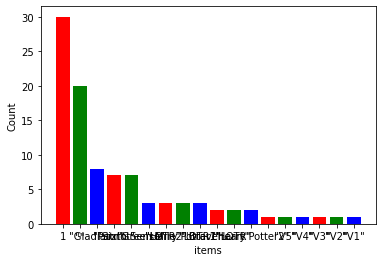

In [15]:
plt.bar(height = frequencies[1:],x = list(range(0,18)),color='rgb');plt.xticks(list(range(0,18),),items[1:]);plt.xlabel("items")
plt.ylabel("Count")

In [20]:
movies_series  = pd.DataFrame(pd.Series(movies_list))
movies_series.columns = ["transactions"]

In [22]:
x = movies_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [23]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [24]:
frequent_itemsets.shape

(694, 2)

In [ ]:
#most frequent items(Support)

In [25]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(3154, 9)

In [36]:
def to_list(i):
    return (sorted(list(i)))

In [37]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [38]:
ma_X = ma_X.apply(sorted)

In [39]:
rules_sets = list(ma_X)

In [40]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [41]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [43]:
final_rules=rules_no_redudancy.sort_values('lift',ascending=False)

In [45]:
final_rules   #sorted by lift-ratio

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1979,"(""V1"")","(""V3"")",0.083333,0.083333,0.083333,1.000000,12.000000,0.076389,inf
3145,"(""V4"")","(""Braveheart"", ""Sixth Sense"")",0.083333,0.083333,0.083333,1.000000,12.000000,0.076389,inf
2526,"(""Gladiator"", ""V2"")","(""V4"")",0.083333,0.083333,0.083333,1.000000,12.000000,0.076389,inf
1473,"(""V3"")","(""Patriot"", ""LOTR1"")",0.083333,0.083333,0.083333,1.000000,12.000000,0.076389,inf
527,"(""Harry Potter2"", ""LOTR1"")","(""V1"")",0.083333,0.083333,0.083333,1.000000,12.000000,0.076389,inf
...,...,...,...,...,...,...,...,...,...
47,(0),"(""Sixth Sense"")",0.833333,0.583333,0.500000,0.600000,1.028571,0.013889,1.041667
67,(1),"(""Sixth Sense"")",0.833333,0.583333,0.500000,0.600000,1.028571,0.013889,1.041667
65,(0),"(""Patriot"")",0.833333,0.583333,0.500000,0.600000,1.028571,0.013889,1.041667
49,(1),"(""Patriot"")",0.833333,0.583333,0.500000,0.600000,1.028571,0.013889,1.041667
